# 1. Extract Chinese Restaurants reviews

In [4]:
import json
import re

In [11]:
#read the merged .json file
data = []
with open("./Stat628/Total.json", encoding = "utf-8" ) as f:
     for line in f:
        data.append(json.loads(line))

In [12]:
data[0]

{'is_open': 0,
 'attributes': {'GoodForKids': 'False'},
 'postal_code': '85016',
 'categories': 'Golf, Active Life',
 'city': 'Phoenix',
 'hours': None,
 'longitude': -112.0184807,
 'Tip': [{'text': 'Played for the first there this past weekend and it was AMAZING',
   'date': '2015-09-23 01:38:48',
   'user_id': 'ce63dEP3lIW6UqMGLe_lfw',
   'business_id': '1SWheh84yJXfytovILXOAQ',
   'compliment_count': 0}],
 'stars': 3.0,
 'latitude': 33.5221425,
 'state': 'AZ',
 'review_count': 5,
 'name': 'Arizona Biltmore Golf Club',
 'address': '2818 E Camino Acequia Drive',
 'Review': [{'stars': 1.0,
   'cool': 0,
   'date': '2015-09-24 00:02:23',
   'text': "Don't go here if you expect consistent or reasonable hours for the driving range.  It's clear the goal for the owners of this course is to hammer down their expenses without any concern for the customer.",
   'user_id': 'WS95iyoiDkbLGeHtERa1-A',
   'review_id': 'BUgmey6v6hZ1WfjbIhpVBg',
   'useful': 2,
   'funny': 0,
   'business_id': '1SWhe

In [13]:
catagory = []
for i in data:
    catagory.append(i["categories"])

In [14]:
catagory[0:10]

['Golf, Active Life',
 'Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood',
 'Sushi Bars, Restaurants, Japanese',
 'Insurance, Financial Services',
 'Plumbing, Shopping, Local Services, Home Services, Kitchen & Bath, Home & Garden, Water Heater Installation/Repair',
 'Shipping Centers, Couriers & Delivery Services, Local Services, Printing Services',
 'Beauty & Spas, Hair Salons',
 "Hair Salons, Hair Stylists, Barbers, Men's Hair Salons, Cosmetics & Beauty Supply, Shopping, Beauty & Spas",
 'Nail Salons, Beauty & Spas, Day Spas',
 'Beauty & Spas, Nail Salons, Day Spas, Massage']

In [15]:
#new is the index of Chinese Restautants
#extract the Chinese Restaurants
new = []
for i in catagory:
    if i == None:
        continue
    if "Chinese" in i:
        if ("Restaurant" in i) or ("Food" in i):
            new.append(catagory.index(i))

In [17]:
Chinese = [data[i] for i in new]

In [18]:
Chinese[0]

{'is_open': 1,
 'attributes': {'Ambience': "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}",
  'RestaurantsAttire': "u'casual'",
  'HasTV': 'False',
  'WiFi': "u'no'",
  'Caters': 'True',
  'GoodForKids': 'True',
  'OutdoorSeating': 'False',
  'RestaurantsTableService': 'True',
  'RestaurantsGoodForGroups': 'True',
  'NoiseLevel': "u'loud'",
  'RestaurantsPriceRange2': '2',
  'RestaurantsReservations': 'True',
  'RestaurantsDelivery': 'False',
  'RestaurantsTakeOut': 'True',
  'Alcohol': "u'full_bar'",
  'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}",
  'BikeParking': 'False',
  'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"},
 'postal_code': 'L5R 3E7',
 'categories': 'Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic

In [19]:
#The amount of Chinese restaurants
len(Chinese)

4434

In [20]:
#Extract the Chinese Restaurants reviews
text = []
for i in Chinese:
    reviews = i["Review"]
    for n in reviews:
        text.append(n["text"])
    

In [21]:
len(text)

447769

In [22]:
text[200]

"I was very dissatisfied with Nee House\nMy wife ordered chicken pan fried noodles last week for take out and was charged $13.02.  This week I ordered the exact same thing but asked for the sauce on the side. They charged me $16.28, My wife called them thinking maybe there was an error,  The owner informed her that there was a $2 charge for having the sauce on the side. We we're charged $3.26 more not $2. To top things off all you get is sauce, chicken, bean sprouts and onions. Needless to say, we will not be going back. Unfortunately, we we're regulars at Silver Dragon but they closed down. The only reason we ordered from Nee House was because of it's close proximity to our residence. We'll be sure to take our business elsewhere."

# 2. Text cleaning

In [24]:
from nltk import sent_tokenize

sentences = []
for review in text:
    sentences += sent_tokenize(review)
    
print(sentences[0])

My girlfriend and I went for dinner at Emerald Chinese after a Thursday night workout.


In [25]:
len(sentences)

3599563

In [26]:
sentences[1]

'We arrived around 7:30pm and were seated after a short wait.'

In [27]:
#delete the punctuation, split the words
sentences = [re.split(r"\W+", sentence) for sentence in sentences]

In [28]:
sentences[0]

['My',
 'girlfriend',
 'and',
 'I',
 'went',
 'for',
 'dinner',
 'at',
 'Emerald',
 'Chinese',
 'after',
 'a',
 'Thursday',
 'night',
 'workout',
 '']

In [23]:
#words 447769条按评论来分的 ，需要写成个文件等待处理
from nltk.tokenize import word_tokenize
words = [word_tokenize(review) for review in text]

In [29]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [30]:
stop_words.discard("not")

In [31]:
stop_words.discard("no")

In [32]:
stop_words.discard("nor")

In [123]:
#filter out the punctuation
words_clean = [word for n in words for word in n if word.isalpha()]
words_clean = [word for word in words_clean if not word in stop_words]

In [124]:
words_clean = [word.lower() for word in words_clean]

In [125]:
words_clean[0:10] #没有lemmatize要后续看一下

['my',
 'girlfriend',
 'i',
 'went',
 'dinner',
 'emerald',
 'chinese',
 'thursday',
 'night',
 'workout']

In [126]:
len(words_clean)

28170706

In [33]:
words_set = set(words_clean)

In [34]:
len(words_set)

67212

In [35]:
words_set = list(words_set)

In [36]:
from nltk import pos_tag

In [37]:
words_tag = pos_tag(words_set)

In [38]:
words_tag[0:10]

[('seafoood', 'NN'),
 ('fluent', 'NN'),
 ('xxxtentacion', 'NN'),
 ('dorky', 'NN'),
 ('overheerste', 'NN'),
 ('decice', 'NN'),
 ('flap', 'VBD'),
 ('epitome', 'JJ'),
 ('scampi', 'NN'),
 ('deducts', 'NNS')]

In [44]:
import nltk

In [57]:
#Try to use sentiment analysis to see what can we get
wnl = nltk.WordNetLemmatizer()

score_list=[]

tag_not_know = []
emotion_not_know = []

import nltk
for idx2,t in enumerate(words_tag):

        newtag=''

        lemmatized=wnl.lemmatize(t[0])
        
        if t[1].startswith('NN'):

            newtag='n'

        elif t[1].startswith('JJ'):

            newtag='a'

        elif t[1].startswith('V'):

            newtag='v'

        elif t[1].startswith('R'):

            newtag='r'

        else:

            newtag='' 
            score_list.append(0)
            tag_not_know.append(t[0])

        if(newtag!=''):    

            synsets = list(swn.senti_synsets(lemmatized, newtag))

            #Getting average of all possible sentiments, as you requested        

            score=0

            if(len(synsets)>0):

                for syn in synsets:

                    score+=syn.pos_score()-syn.neg_score()

                score_list.append(score/len(synsets))
            else:
                score_list.append(0)
                emotion_not_know.append(t[0])
                

            

In [75]:
words_emotion = []
for index,i in enumerate(score_list):
    if (i != 0):
        score = (words_set[index],i)
        words_emotion.append(score)
        
        

In [94]:
wnl.lemmatize("beef")

'beef'

In [76]:
len(tag_not_know)

898

In [77]:
len(emotion_not_know)

40770

In [78]:
len(words_emotion)

11797

In [79]:
words_emotion[0:20]

[('beef', -0.5),
 ('incredulity', 0.375),
 ('panting', -0.0625),
 ('territory', 0.08333333333333333),
 ('admission', 0.125),
 ('magnitude', 0.08333333333333333),
 ('vetoed', -0.3125),
 ('explosively', 0.0625),
 ('surpasses', -0.09375),
 ('unfortunates', -0.25),
 ('accepted', 0.09090909090909091),
 ('arts', 0.15625),
 ('goes', 0.0125),
 ('puzzled', -0.375),
 ('sloth', -0.041666666666666664),
 ('detested', -0.75),
 ('bawling', -0.08333333333333333),
 ('prohibition', 0.025),
 ('sulked', -0.25),
 ('gnawing', -0.125)]

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [98]:
words_text = " ".join(word for word in words[0:1000000])

In [22]:
words_count = {}
for word in words:
    if word in words_count:
        words_count[word] += 1
    else :
        words_count[word] = 1

In [23]:
words_count["busy"]

24940

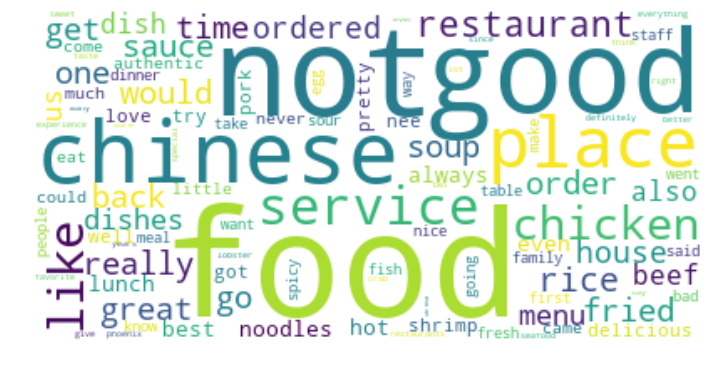

In [24]:
wordcloud1 = WordCloud(background_color= "white", max_words= 100).fit_words(words_count)

plt.figure(1,figsize=(12,12))
# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [106]:
words_des_text = " ".join(word for word in words_des[0:1000000])

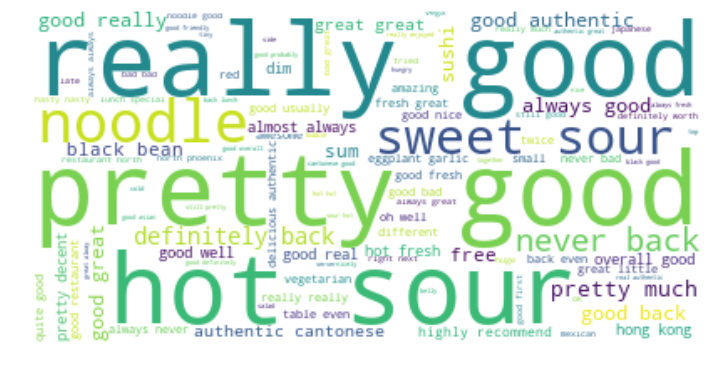

In [109]:
wordcloud2 = WordCloud(background_color= "white", max_words= 100).generate(words_des_text)

plt.figure(1,figsize=(12,12))
# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
#Using sentences to model the vector
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [33]:
print(stop_words)

{'ain', "won't", 'wouldn', 'in', 'further', 'hasn', 'be', 'which', 'where', 'its', 've', 'not', "should've", "shan't", 'we', 'some', 'didn', 'their', 'because', 'both', 'couldn', 'll', 'yours', 'above', 'over', 'if', 'y', 'again', 'itself', 'why', 'from', 'how', 'any', 't', 'that', 'them', "didn't", 'those', 'i', 'should', 'mustn', 'while', 'after', 'off', 'all', 'through', 'me', 'on', 'd', "needn't", 'haven', 'was', 'being', 'themselves', 'very', 'it', 'just', 'until', 'no', 'with', 'm', 'same', "haven't", "wouldn't", "mightn't", 'or', 'hers', 'most', 'yourself', 'your', "you'll", 'into', 'now', 'myself', 'a', 'will', 'were', 'have', 'as', 'had', 'theirs', 'here', 'for', 'the', "mustn't", 'shouldn', 'him', 'are', 'then', 'does', 'wasn', 'so', 'ma', 'am', 'during', 'but', 'weren', 'has', 'yourselves', 'our', 'whom', 'these', 'been', 'did', 'an', 'between', 'other', "couldn't", 're', 'hadn', "aren't", "isn't", 'shan', "you'd", 'himself', 'don', 'her', 'to', 'they', 'of', 'against', "sho

In [33]:
#delete the space and the stop words
sentences_clean = []
for sentence in sentences:
    cleaned = []
    for word in sentence:
        if (word != "") and (not word in stop_words):
            cleaned.append(word.lower())
    sentences_clean.append(cleaned)
            

In [36]:
sentences_clean[0]

['my',
 'girlfriend',
 'i',
 'went',
 'dinner',
 'emerald',
 'chinese',
 'thursday',
 'night',
 'workout']

In [35]:
phrases = [("dim","sum"),("egg","roll")]

In [ ]:
phrases_score = []
for phrase in phrases:
    score = []
    for sentence in sentences_clean:
        index = 0
        if phrase[0] in sentence:
            index = sentence.index(phrase[0])
            if sentence[index+1] == phrase[1]:
                score.append(getsentiscore(sentence))
    
    phrases_score.append(score)
            
            
            

In [43]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [45]:
#Stemming and lemmatizing
sentences_stemmed =[]
for sentence in sentences_clean:
    stemmed = []
    for word in sentence:
        stemmed.append(porter.stem(word))
        
    sentences_stemmed.append(stemmed)

In [74]:
sentences_stemmed[0:10]

[['my',
  'girlfriend',
  'i',
  'went',
  'dinner',
  'emerald',
  'chines',
  'thursday',
  'night',
  'workout'],
 ['we', 'arriv', 'around', '7', '30pm', 'seat', 'short', 'wait'],
 ['after',
  'brows',
  'menu',
  'brief',
  'discuss',
  'waiter',
  'order',
  'seafood',
  'noodl',
  '3',
  'item',
  'mix',
  'meat',
  'plate',
  'bbq',
  'pork',
  'chicken',
  'duck',
  'the',
  'food',
  'came',
  'soon',
  'thereaft',
  'hot',
  'delici'],
 ['there',
  'larg',
  'portion',
  'lot',
  'seafood',
  'seafood',
  'noodl',
  'mix',
  'meat',
  'plate',
  'came',
  'good',
  'cut',
  'meat',
  'correct',
  'sauc'],
 ['after', 'meal', 'receiv', 'fortun', 'cooki', 'dessert'],
 ['food', 'the', 'food', 'good', 'qualiti'],
 ['ingredi', 'tast', 'fresh', 'dish', 'tast', 'well', 'made'],
 ['food', 'averag', 'noth', 'stood', 'even', 'though', 'i', 'quit', 'hungri'],
 ['price',
  'price',
  'high',
  'compar',
  'chines',
  'cuisin',
  'compar',
  'larg',
  'western',
  'restaur',
  'chain'],
 [

In [47]:
# Something can also be deleted : Numbers, Date, 

In [69]:
#Write a Chinese.text included all the cleaned word
with open("Chinese.text", "w", encoding= "utf-8") as p:
    for sentence in sentences_stemmed:
        for word in sentence:
            p.write(word+"\n")

In [48]:
from gensim.models import Word2Vec

In [49]:
model = Word2Vec(sentences_stemmed, min_count = 100, workers = 8)

In [50]:
print(model)

Word2Vec(vocab=5146, size=100, alpha=0.025)


In [51]:
words = list(model.wv.vocab)

In [52]:
model.wv.save_word2vec_format('model.bin')
#model = Word2Vec.load('model.bin')

In [53]:
print(words[0:100])

['my', 'girlfriend', 'i', 'went', 'dinner', 'emerald', 'chines', 'thursday', 'night', 'we', 'arriv', 'around', '7', '30pm', 'seat', 'short', 'wait', 'after', 'brows', 'menu', 'brief', 'discuss', 'waiter', 'order', 'seafood', 'noodl', '3', 'item', 'mix', 'meat', 'plate', 'bbq', 'pork', 'chicken', 'duck', 'the', 'food', 'came', 'soon', 'hot', 'delici', 'there', 'larg', 'portion', 'lot', 'good', 'cut', 'correct', 'sauc', 'meal', 'receiv', 'fortun', 'cooki', 'dessert', 'qualiti', 'ingredi', 'tast', 'fresh', 'dish', 'well', 'made', 'averag', 'noth', 'stood', 'even', 'though', 'quit', 'hungri', 'price', 'high', 'compar', 'cuisin', 'western', 'restaur', 'chain', 'servic', 'slightli', 'a', 'common', 'poor', 'waitress', 'impati', 'except', 'staff', 'appear', 'rush', 'all', 'need', 'met', 'grumpi', 'decor', 'comfort', 'chair', 'nice', 'tablecloth', 'suffici', 'room', 'navig', 'tabl', 'overal']


In [54]:
X = model[model.wv.vocab]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [55]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [56]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

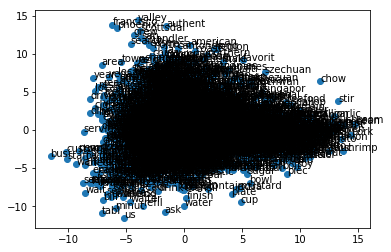

In [57]:
#Use Word2vector to see what can we get
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))


pyplot.show()